<a href="https://colab.research.google.com/github/josephychin/forest-fires/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 - Part 3

Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to finish data cleaning and EDA if you have not done so already. If you finished this last week, you should begin modeling.

Commit your data and any work you do to your GitHub repository.

In [1]:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
X = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'X', 'Y']]

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [9]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
df['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Clusters of Fires')

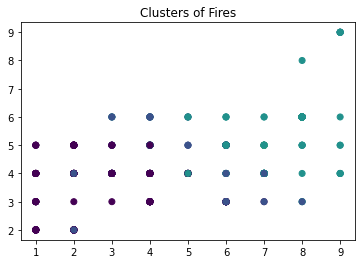

In [11]:
plt.scatter(df['X'], df['Y'], c = df['cluster'])
plt.title('Clusters of Fires')

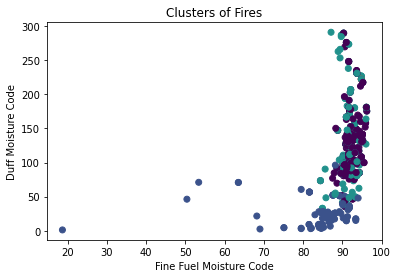

In [13]:
plt.scatter(df['FFMC'], df['DMC'], c = df['cluster'])
plt.xlabel('Fine Fuel Moisture Code')
plt.ylabel('Duff Moisture Code')
plt.title('Clusters of Fires');

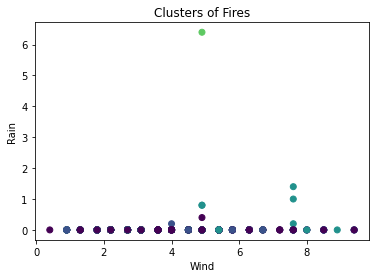

In [14]:
plt.scatter(df['wind'], df['rain'], c = df['cluster'])
plt.xlabel('Wind')
plt.ylabel('Rain')
plt.title('Clusters of Fires');

In [15]:
df['cluster'].value_counts()

0    237
2    167
1    110
4      2
3      1
Name: cluster, dtype: int64

In [16]:
seg1 = df[df['cluster'] == 0]
seg2 = df[df['cluster'] == 1]
seg3 = df[df['cluster'] == 2]
seg4 = df[df['cluster'] == 3]
seg5 = df[df['cluster'] == 4]

In [17]:
fire_segs = [seg1, seg2, seg3, seg4, seg5]
for segment in fire_segs:
  print(segment.describe().T)

         count        mean        std    min    25%     50%     75%     max
X        237.0    2.928270   1.498277    1.0    2.0    3.00    4.00    7.00
Y        237.0    3.641350   0.957829    2.0    3.0    4.00    4.00    5.00
FFMC     237.0   92.226582   1.862091   81.6   91.1   92.10   93.50   96.20
DMC      237.0  129.669620  46.509611   35.4   99.6  122.30  146.00  290.00
DC       237.0  667.761603  98.511479  296.3  624.2  689.10  728.60  855.30
ISI      237.0    9.986920   3.716129    1.9    7.1    9.00   12.20   21.30
temp     237.0   21.082700   4.355485    9.8   18.3   20.70   23.70   33.10
RH       237.0   41.729958  14.035777   15.0   32.0   40.00   49.00   88.00
wind     237.0    3.749789   1.659248    0.4    2.2    3.60    4.90    9.40
rain     237.0    0.001688   0.025983    0.0    0.0    0.00    0.00    0.40
area     237.0    9.148819  27.236797    0.0    0.0    0.71    6.43  212.88
cluster  237.0    0.000000   0.000000    0.0    0.0    0.00    0.00    0.00
         cou